<div class="image123">
    <div class="imgContainer">
        <img src="./logos/UNEnvironment.png" alt="UNEP logo" style="width:200px">
    </div>
    <div class="imgContainer">
        <img src="./logos/GI-REC.png" alt="GI_REC logo" style="width:200px">
    </div>
</div>

# Visualize transition scenarios

UN Environment

In [1]:
import datetime; print(datetime.datetime.now())

2017-10-20 10:57:11.647896


In [2]:
#import pandas as pd
#import numpy as np

In [3]:
#import seaborn as sn
#import matplotlib.pyplot as plt

In [4]:
from urbanmetabolism.population.model import plot_projected_weights, plot_data_projection, _merge_data

In [5]:
iterations = 1000
typ = 'resampled'
model_name = 'Sorsogon_Electricity_Water_wbias_projected_dynamic_{}'.format(typ)
reweighted_survey = 'data/survey_{}_{}'.format(model_name, iterations)

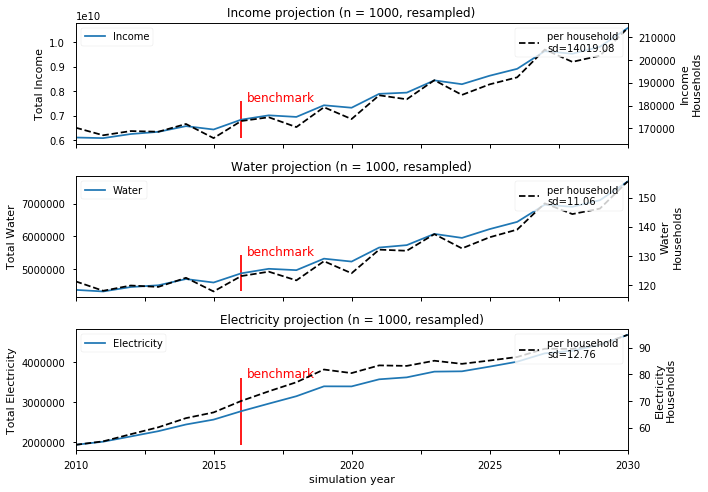

In [6]:
var = ['Income', 'Water', 'Electricity']
data = plot_data_projection(
    reweighted_survey, var, "{}, {}".format(iterations, typ),
    benchmark_year=2016 
)

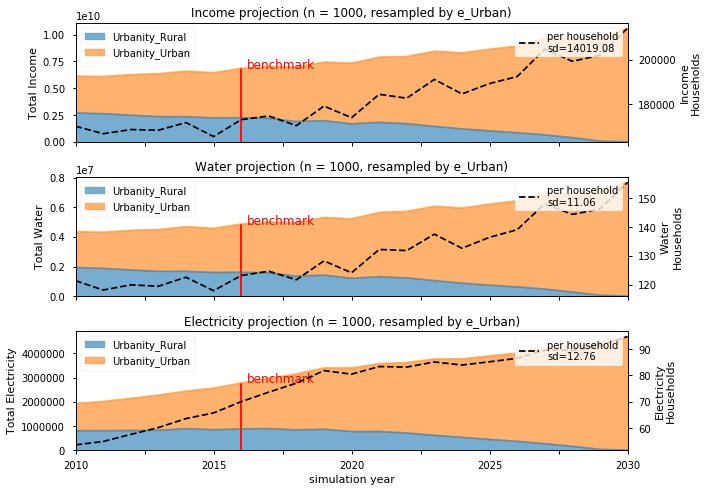

In [7]:
var = ['Income', 'Water', 'Electricity']
groupby = 'e_Urban'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}".format(iterations, typ, groupby),
    benchmark_year = 2016,
    groupby = groupby
)

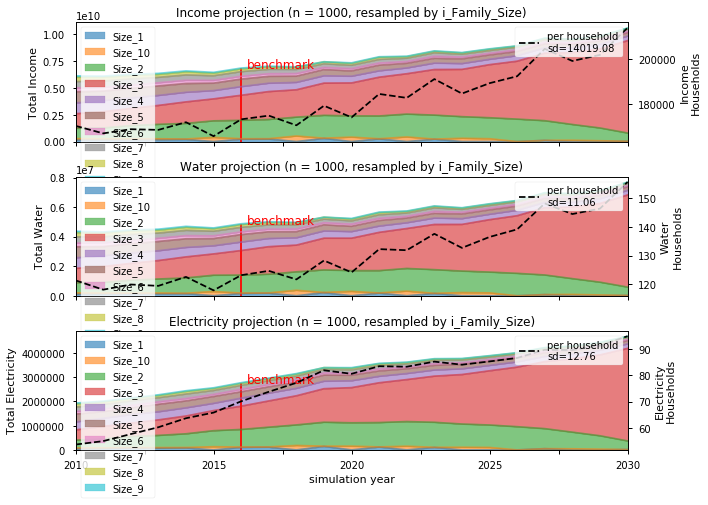

In [8]:
var = ['Income', 'Water', 'Electricity']
groupby = 'i_Family_Size'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}".format(iterations, typ, groupby),
    benchmark_year = 2016,
    groupby = groupby
)

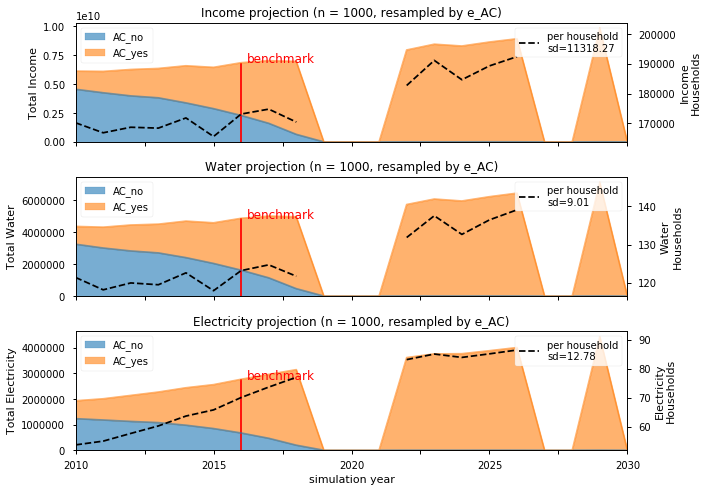

In [27]:
var = ['Income', 'Water', 'Electricity']
groupby = 'e_AC'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}".format(iterations, typ, groupby),
    benchmark_year = 2016,
    groupby = groupby
)

In [28]:
data

e_AC,AC_no,AC_yes
2010,1.234536e+06,6.971435e+05
2011,1.181509e+06,8.283551e+05
2012,1.125878e+06,1.014923e+06
2013,1.079810e+06,1.193007e+06
2014,9.783520e+05,1.461462e+06
2015,8.477604e+05,1.713970e+06
2016,6.745139e+05,2.097270e+06
2017,4.678560e+05,2.493367e+06
2018,1.981942e+05,2.948480e+06
2019,NaN,NaN


In [23]:
import numpy as np
pr = [i for i in np.linspace(0.1, 0.6, num=15)]
pr = [0]*6 + pr
scenario_name = 'scenario 1'

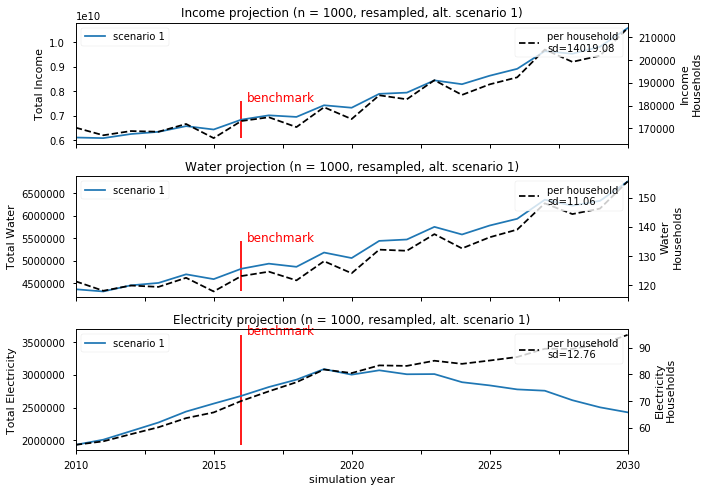

In [19]:
var = ['Income', 'Water', 'Electricity']
data = plot_data_projection(
    reweighted_survey, var, "{}, {}, alt. scenario 1".format(iterations, typ),
    benchmark_year=2016, pr = pr, scenario_name = scenario_name
)

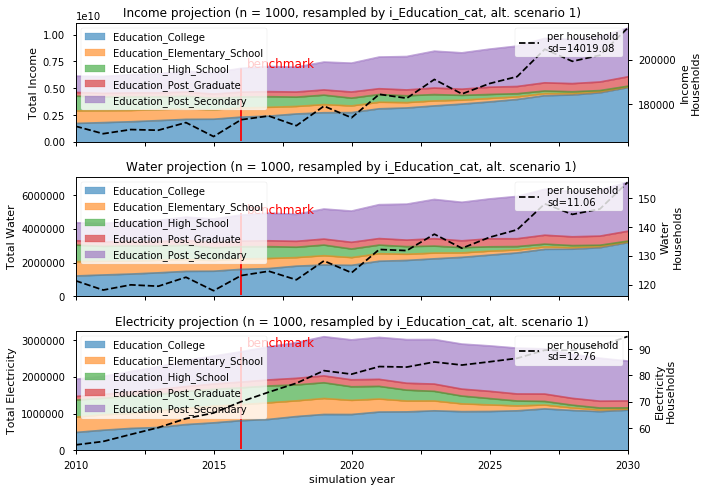

In [20]:
var = ['Income', 'Water', 'Electricity']
groupby = 'i_Education_cat'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}, alt. scenario 1".format(iterations, typ, groupby),
    benchmark_year = 2016, pr = pr, scenario_name = scenario_name,
    groupby = groupby
)

In [24]:
scenario_name = 'scenario 1'

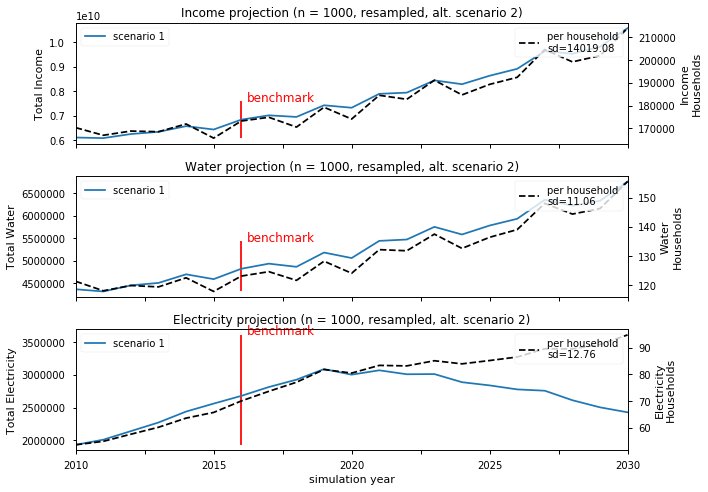

In [25]:
var = ['Income', 'Water', 'Electricity']
data = plot_data_projection(
    reweighted_survey, var, "{}, {}, alt. scenario 2".format(iterations, typ),
    benchmark_year=2016, pr = pr, scenario_name = scenario_name
)

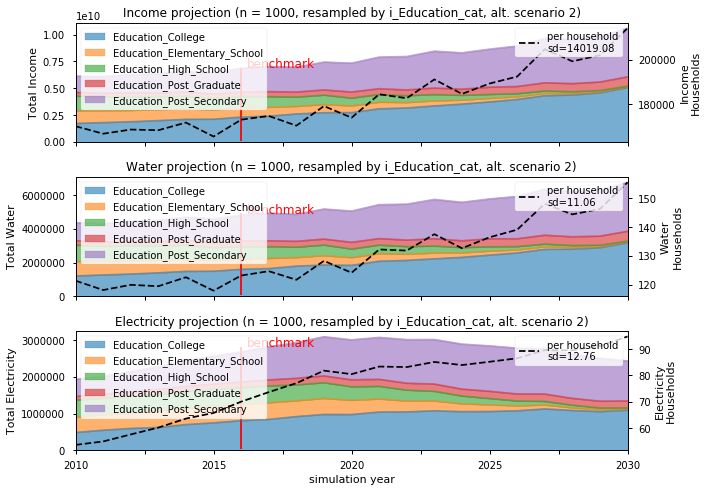

In [26]:
var = ['Income', 'Water', 'Electricity']
groupby = 'i_Education_cat'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}, alt. scenario 2".format(iterations, typ, groupby),
    benchmark_year = 2016, pr = pr, scenario_name = scenario_name,
    groupby = groupby
)